In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os


In [2]:
os.chdir("C:\\Users\\Divya\\Desktop\\Folder")
df = pd.read_csv('Iris.csv')
df 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
print(df.head())
print(df.info())
print(df.describe())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               

In [4]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

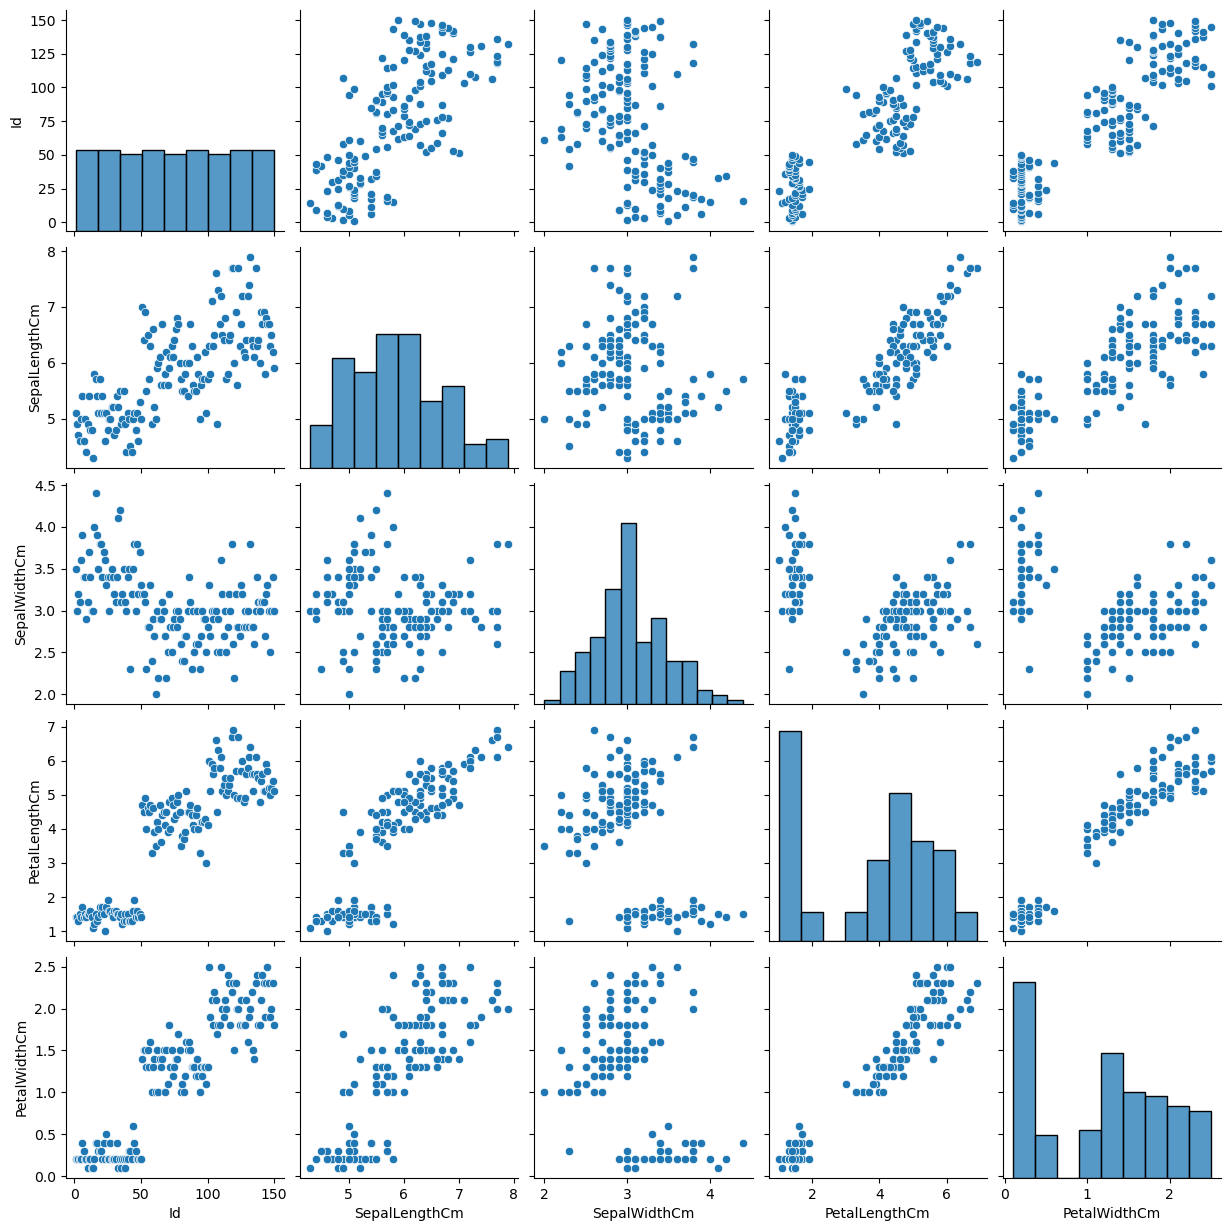

In [8]:
sns.pairplot(df)

E:\Anaconda\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
E:\Anaconda\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
E:\Anaconda\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
E:\Anaconda\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


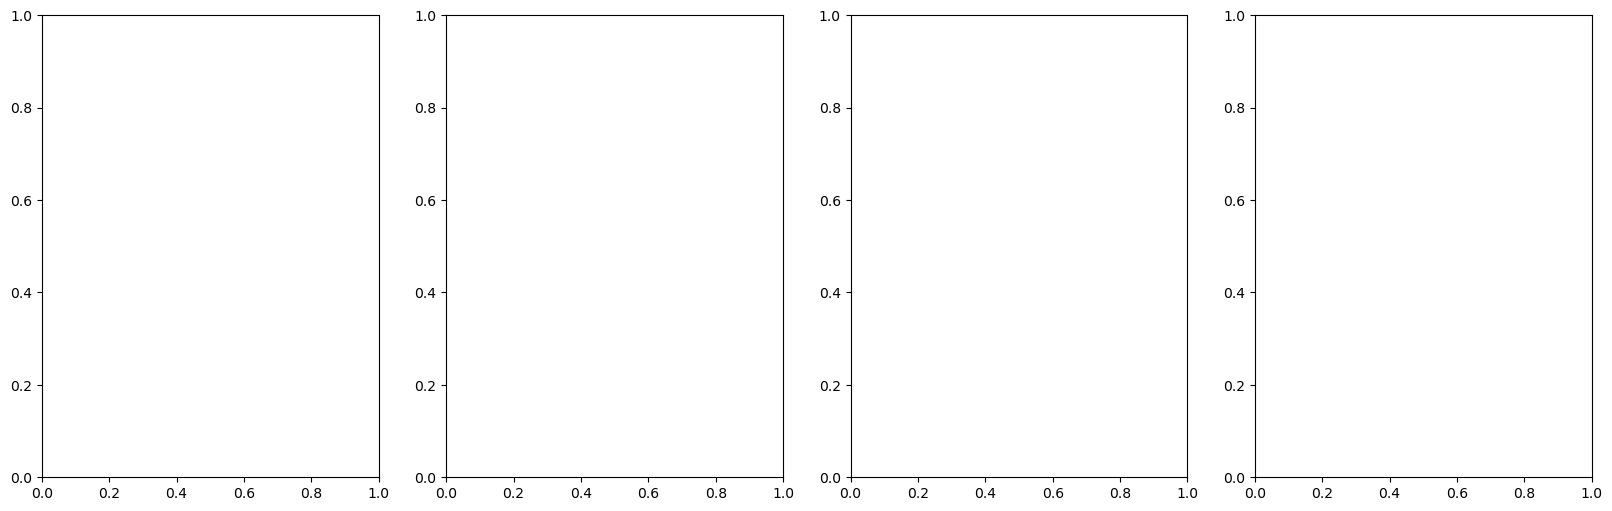

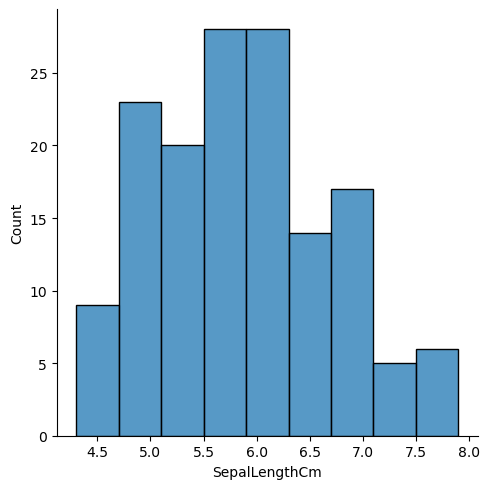

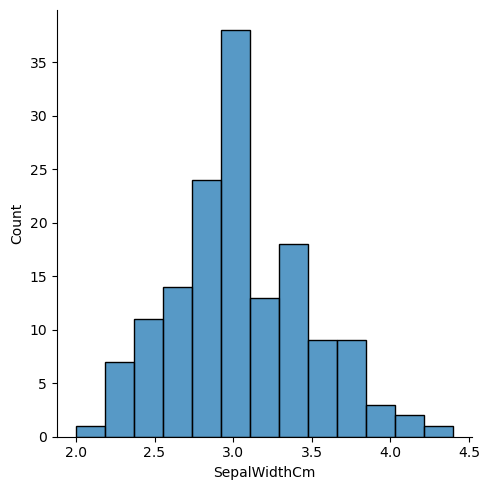

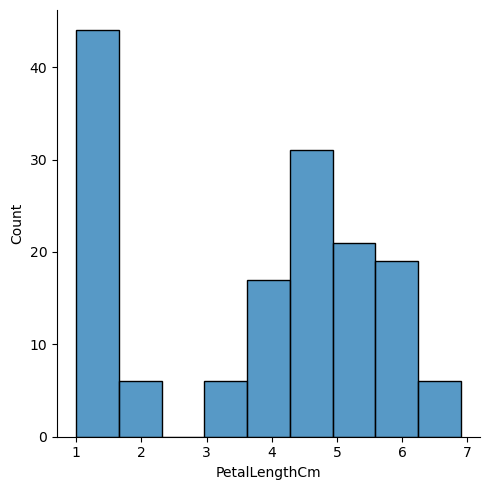

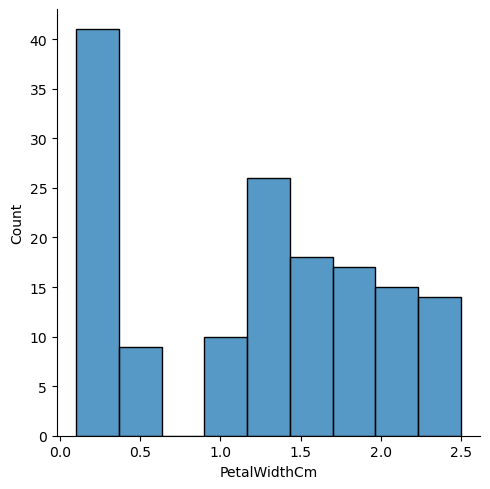

In [9]:
fig, ax=plt.subplots(1,4,figsize=(20,6))

sns.displot(df.SepalLengthCm,ax=ax[0])
sns.displot(df.SepalWidthCm,ax=ax[1])
sns.displot(df.PetalLengthCm,ax=ax[2])
sns.displot(df.PetalWidthCm,ax=ax[3])

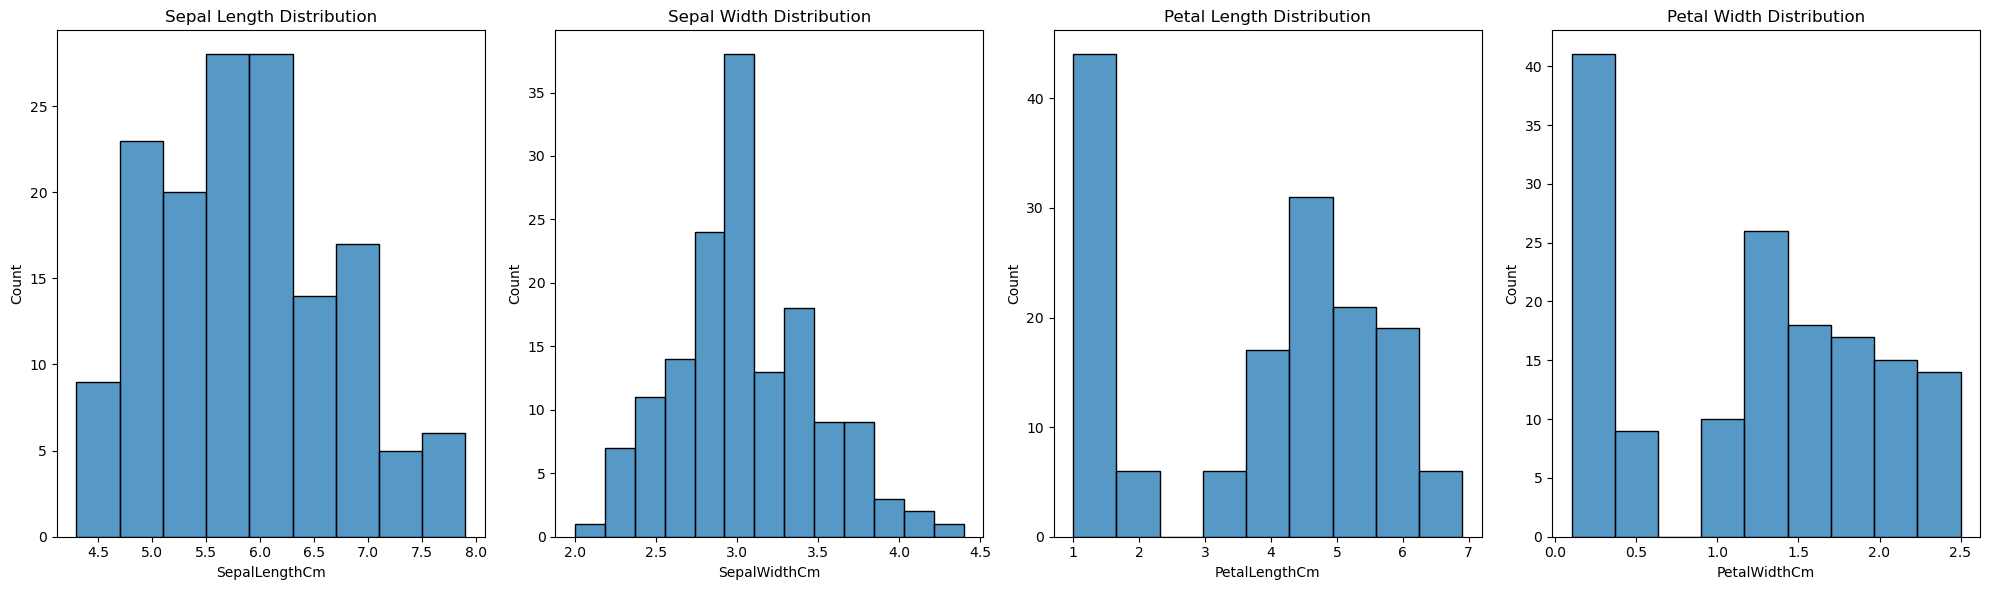

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

# Plotting the distribution of Sepal Length
sns.histplot(df['SepalLengthCm'], ax=ax[0])
ax[0].set_title('Sepal Length Distribution')

# Plotting the distribution of Sepal Width
sns.histplot(df['SepalWidthCm'], ax=ax[1])
ax[1].set_title('Sepal Width Distribution')

# Plotting the distribution of Petal Length
sns.histplot(df['PetalLengthCm'], ax=ax[2])
ax[2].set_title('Petal Length Distribution')

# Plotting the distribution of Petal Width
sns.histplot(df['PetalWidthCm'], ax=ax[3])
ax[3].set_title('Petal Width Distribution')

# visualization
plt.tight_layout()
plt.show()

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

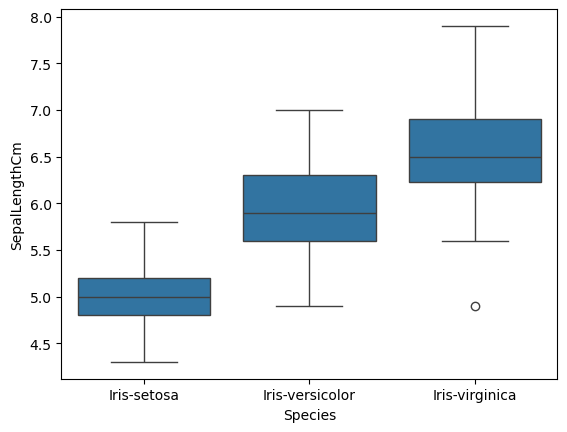

In [11]:
sns.boxplot(x="Species", y="SepalLengthCm", data=df)

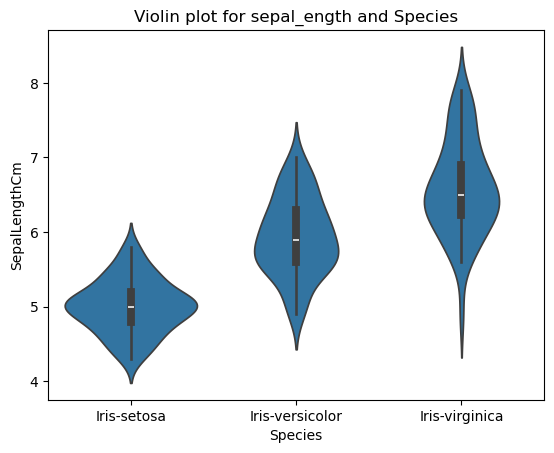

In [12]:
sns.violinplot(x="Species", y="SepalLengthCm", data=df)
plt.title("Violin plot for sepal_ength and Species")
plt.show()

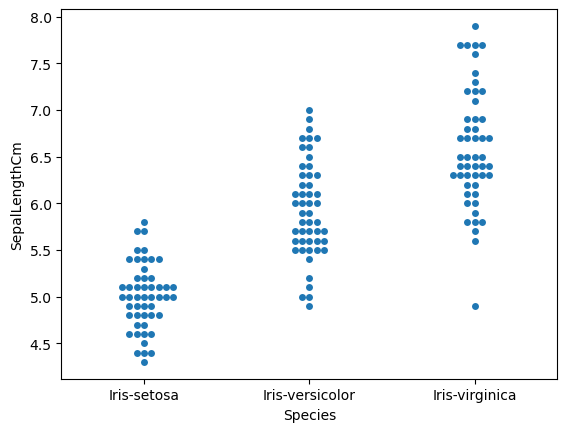

In [13]:
ax=sns.swarmplot(x="Species", y="SepalLengthCm", data=df)

## Load the Iris dataset

In [14]:
iris = load_iris()
X = iris.data
y = iris.target


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Initialize and train the Decision Tree classifier

In [17]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [18]:
#Prediction
y_pred = clf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


## K-Neighbors Classifier

In [20]:
X = df.drop('Species', axis=1)
y = df['Species']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [22]:
y_predict = neigh.predict(x_test)

In [23]:
predictions=neigh.predict(x_test)

## Logistic Regression

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

logmodel = LogisticRegression()
logmodel.fit(x_train_scaled, y_train)


LogisticRegression()

In [25]:
predictions = logmodel.predict(x_test.values)


In [26]:
accuracy_score(y_test, predictions)

0.36666666666666664

## Evaluate the model

In [27]:
X = df.drop('Species', axis=1)
y = df['Species']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

# predictions on the test set
y_pred = neigh.predict(x_test)


In [28]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

